In [2]:
from __future__ import unicode_literals, print_function, division

# System imports
import os
import sys
import argparse

# Numerics
import numpy as np
from numpy import ma
from scipy.interpolate import InterpolatedUnivariateSpline
from math import floor

# Plotting
import matplotlib.pyplot as plt
from matplotlib import scale as mscale
from matplotlib.transforms import Transform
from matplotlib.ticker import FixedLocator



In [3]:
def CPU_parser():
    parser = argparse.ArgumentParser(
        description=(
            'CPU, a CLASS Plotting Utility, specify wether you want\n'
            'to superimpose, or plot the ratio of different files.'),
        epilog=(
            'A standard usage would be, for instance:\n'
            'python CPU.py output/test_pk.dat output/test_pk_nl_density.dat'
            ' -r\npython CPU.py output/wmap_cl.dat output/planck_cl.dat'),
        formatter_class=argparse.RawDescriptionHelpFormatter)

    parser.add_argument(
        'files', type=str, nargs='*', help='Files to plot')
    parser.add_argument('-r', '--ratio', dest='ratio', action='store_true',
                        help='Plot the ratio of the spectra')
    parser.add_argument('-y', '--y-axis', dest='y_axis', nargs='+',
                        help='specify the fields you want to plot.')
    parser.add_argument('-x', '--x-axis', dest='x_axis', type=str,
                        help='specify the field to be used on the x-axis')
    parser.add_argument('--scale', type=str,
                        choices=['lin', 'loglog', 'loglin', 'george'],
                        help='Specify the scale to use for the plot')
    parser.add_argument('--xlim', dest='xlim', nargs='+', type=float,
                        default=[], help='Specify the x range')
    parser.add_argument('--ylim', dest='ylim', nargs='+', type=float,
                        default=[], help='Specify the y range')
    parser.add_argument(
        '-p, --print',
        dest='printfile', default='',
        help=('print the graph directly in a file. If no name is specified, it'
              'uses the name of the first input file'))
    parser.add_argument(
        '--repeat',
        dest='repeat', action='store_true', default=False,
        help='repeat the step for all redshifts with same base name')
    return parser

In [4]:
data_PATH="/home/lloyd/Projects/class_public/output/";
output_PATH="/home/lloyd/Projects/class_public/MyWorkspace/Plots";


In [51]:
datafile_default_PATH="../output/dsg_test_normal00_cl.dat"
datafile_nef_extra_PATH="../output/dsg_test_nef1000_cl.dat"
datafile_param_PATH="../output/dsg_test_param10_nef_pp00_cl.dat"
datafile_param2_PATH="../output/dsg_test2_param00_cl.dat"
datafile_param3_PATH="../output/dsg_test3_param00_cl.dat"
datafiles=[datafile_default_PATH,datafile_nef_extra_PATH,datafile_param_PATH,datafile_param2_PATH,datafile_param3_PATH]

In [5]:
datafile_default_PATH="../output/dsg_test_normal00_cl.dat"
datafile_nef_extra_PATH="../output/dsg_test_nef1000_cl.dat"
datafile_param_PATH="../output/dsg_test400_cl.dat"
datafiles=[datafile_default_PATH,datafile_nef_extra_PATH,datafile_param_PATH]

In [6]:
data = []
for data_file in datafiles:
    data.append(np.loadtxt(data_file))

In [7]:
k_vals=data[0][:,0]
cl0_vals=data[0][:,1]
cl_nef=data[1][:,1]
cl_param=data[2][:,1]

In [11]:
cl_diff_ratio_nef=(cl_nef-cl0_vals)/cl0_vals
cl_diff_ratio_param=(cl_param-cl0_vals)/cl0_vals

In [54]:
cl_ratio_nef=cl_nef/cl0_vals
cl_ratio_param=cl_param/cl0_vals
cl_ratio_param2=cl_param2/cl0_vals
cl_ratio_param3=cl_param3/cl0_vals

In [8]:
cl_ratio_nef=cl_nef/cl0_vals
cl_ratio_param=cl_param/cl0_vals

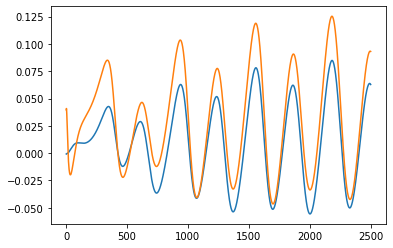

In [12]:
plt.plot(k_vals,cl_diff_ratio_nef,k_vals,cl_diff_ratio_param)

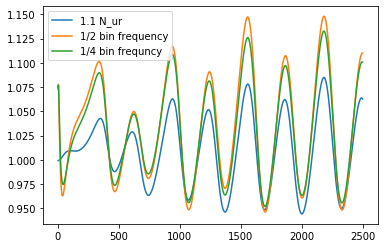

In [57]:
plt.plot(k_vals,cl_ratio_nef,k_vals,cl_ratio_param,k_vals,cl_ratio_param2)
plt.legend(("1.1 N_ur","1/2 bin frequency", "1/4 bin frequncy"))

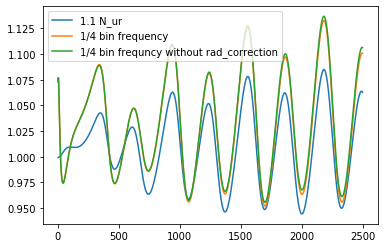

In [60]:
plt.plot(k_vals,cl_ratio_nef,k_vals,cl_ratio_param2,k_vals,cl_ratio_param3)
plt.legend(("1.1 N_ur","1/4 bin frequency", "1/4 bin frequncy without rad_correction"))

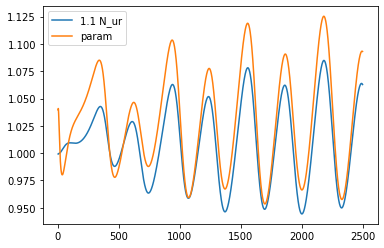

In [13]:
plt.plot(k_vals,cl_ratio_nef,k_vals,cl_ratio_param)
plt.legend(("1.1 N_ur","param"))